In [1]:
import os
os.chdir("./img_for_editing")

In [6]:
!pwd
!ls

/export/home/yyang/PycharmProjects/Image_editing_relighting/img_for_editing
00303_034_300_55_4700_Image_input.png
00303_034_300_55_4700_Reconstruct.png
00303_034_300_55_4700_Reflectance_gt.png
00303_034_300_55_4700_Reflectance_predict.png
00303_034_300_55_4700_Relighted_gt.png
00303_034_300_55_4700_Relighted_predict.png
00303_034_300_55_4700_Shading_new_gt.png
00303_034_300_55_4700_Shading_new_predict.png
00303_034_300_55_4700_Shading_ori_gt.png
00303_034_300_55_4700_Shading_ori_predict.png


In [2]:
import cv2
from PIL import Image
import cv2
import numpy
import matplotlib.pyplot as plt

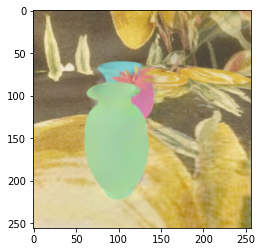

In [7]:
ref_pred = Image.open("00303_034_300_55_4700_Reflectance_predict.png").convert('RGB')
plt.imshow(numpy.array(ref_pred))
plt.show()

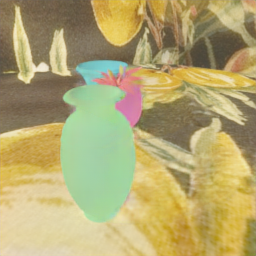

In [5]:
ref_pred

In [8]:
def show_image(img):
    plt.imshow(img.astype('uint8'))
    plt.show()

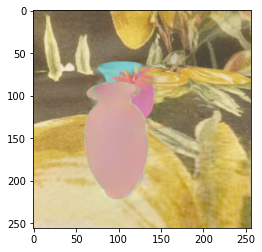

In [22]:
ref = numpy.array(ref_pred).astype('float')
for i in range(256):
    for j in range(256):
        color = ref[i, j]
        if color[1] > 180 and color[0] < color[1]-30 and color [2] < color[1]-30:
            temp = color[1]
            color[1] = color[0]
            color[0] = temp
show_image(ref)

In [24]:
cv2.imwrite('ref_test.png', ref[:, :, [2,1,0]].astype('uint8'))

True

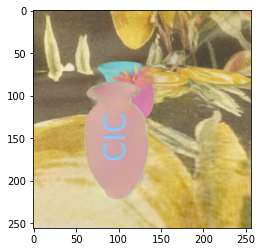

In [32]:
ref_edit = Image.open("ref_test_edit.png").convert('RGB')
plt.imshow(numpy.array(ref_edit))
plt.show()

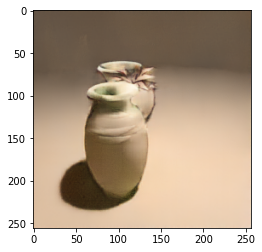

In [33]:
shading_new = Image.open("00303_034_300_55_4700_Shading_new_predict.png").convert('RGB')
plt.imshow(numpy.array(shading_new))
plt.show()

In [34]:
ref_edit = numpy.array(ref_edit).astype('float')
shading_new = numpy.array(shading_new).astype('float')
img_relit_edit = ref_edit * shading_new / 255.0

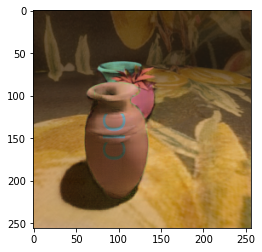

In [35]:
show_image(img_relit_edit)

In [37]:
cv2.imwrite('img_relit_edit.png', img_relit_edit[:, :, [2,1,0]].astype('uint8'))

True

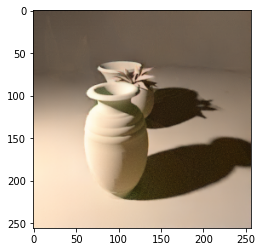

In [38]:
shading_ori = Image.open("00303_034_300_55_4700_Shading_ori_predict.png").convert('RGB')
plt.imshow(numpy.array(shading_ori))
plt.show()

In [39]:
shading_ori = numpy.array(shading_ori).astype('float')
img_edit = ref_edit * shading_ori / 255.0
cv2.imwrite('img_edit.png', img_edit[:, :, [2,1,0]].astype('uint8'))

True